<a href="https://colab.research.google.com/github/robertopaulo/CienciaDeDados/blob/main/Cogumelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
# Fazer upload do arquivo do seu computador
arquivo= files.upload()

Saving agaricus-lepiota.data to agaricus-lepiota.data
Saving agaricus-lepiota.names to agaricus-lepiota.names


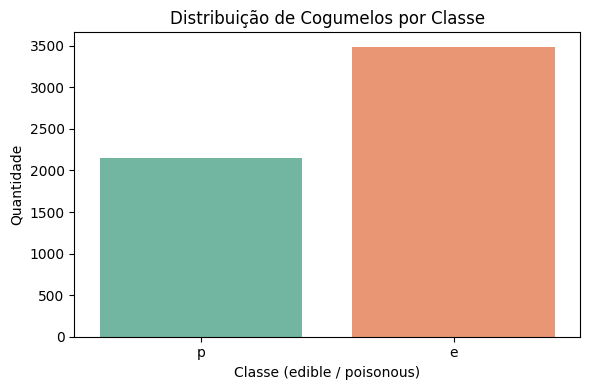

Valores ausentes por coluna:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64




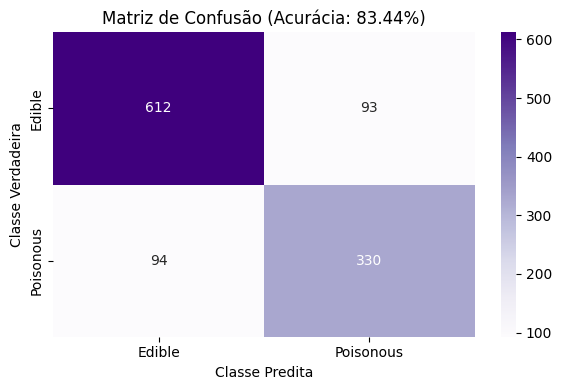

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Reverter a codificação da classe para rótulos legíveis
class_names = label_encoders["class"].inverse_transform(df["class"])

# Gráfico de barras da distribuição da classe
plt.figure(figsize=(6, 4))
sns.countplot(x=class_names, hue=class_names, palette="Set2", legend=False)
plt.title("Distribuição de Cogumelos por Classe")
plt.xlabel("Classe (edible / poisonous)")
plt.ylabel("Quantidade")
plt.tight_layout()
plt.show()

# Nomes das colunas baseados no arquivo agaricus-lepiota.names
column_names = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape",
    "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type",
    "veil-color", "ring-number", "ring-type", "spore-print-color", "population",
    "habitat"
]

# Ler o arquivo
df = pd.read_csv("agaricus-lepiota.data", header=None, names=column_names)

# Verificar dados ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

# Substituir interrogações (valores faltantes) por NaN e remover linhas com valores faltantes
df.replace("?", pd.NA, inplace=True)
df.dropna(inplace=True)

# Codificar todos os atributos categóricos
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separar features e classe
X = df.drop("class", axis=1)
y = df["class"]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar modelo Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliação do modelo
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\n")
# Plot da matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
plt.title(f"Matriz de Confusão (Acurácia: {acc:.2%})")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Verdadeira")
plt.tight_layout()
plt.show()